In [1]:
pip install tensorflow scikit-learn pandas seaborn numpy matplotlib catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt                   
%matplotlib inline
sns.set(color_codes=True)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('A')

A


In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [7]:
#importing dataset
df=pd.read_csv("thyroid_dataset_women.csv")

In [9]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [11]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [13]:
#Row-Column
df.shape

(383, 17)

In [15]:
#Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [17]:
#Null check
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [19]:
#duplicate check
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (19, 17)


In [21]:
df.drop_duplicates(inplace=True)

In [23]:
# Rename the columns for better understanding
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [25]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Smoking History         object
Radiotherapy History    object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
Tumor                   object
Lymph Nodes             object
Cancer Metastasis       object
Stage                   object
Treatment Response      object
Recurred                object
dtype: object

In [27]:
## Exploratory Data Analysis 

In [29]:
df['Recurred'].value_counts()

Recurred
No     256
Yes    108
Name: count, dtype: int64

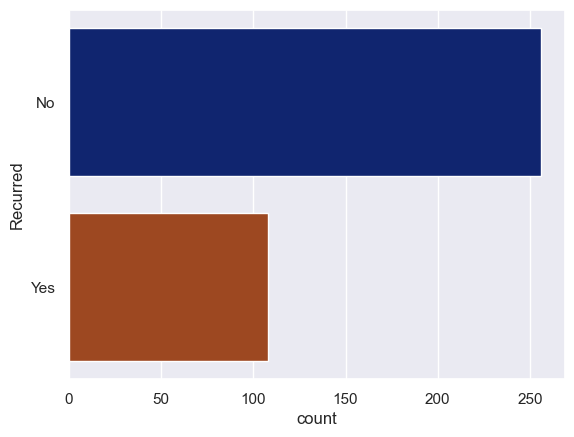

In [31]:
sns.countplot(y = 'Recurred', data =df, palette = 'dark')
plt.show()

In [33]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            135
Single nodular goiter-right    127
Single nodular goiter-left      88
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

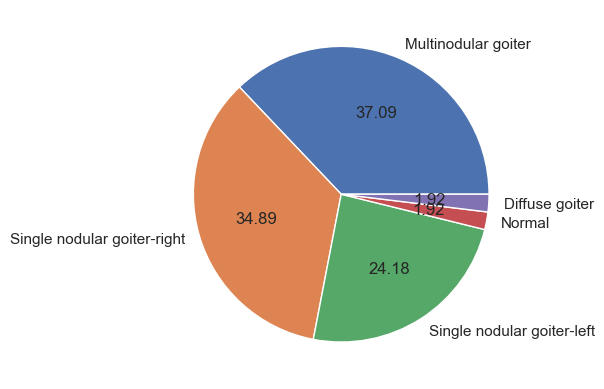

In [35]:
df["Physical Examination"].value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel(None)
plt.show()

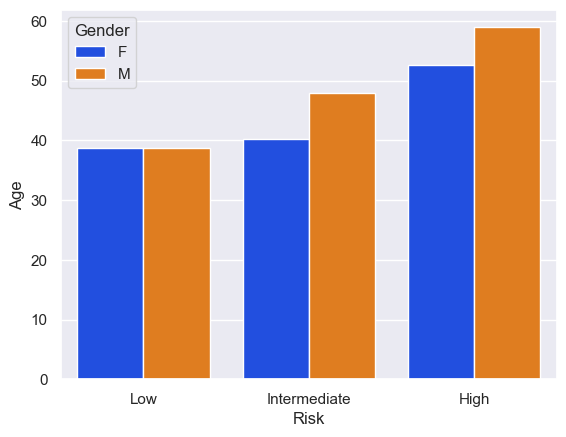

In [37]:
#Risk assessment
sns.barplot(df,x="Risk",y="Age",hue="Gender", ci = None, palette = 'bright')
plt.show()

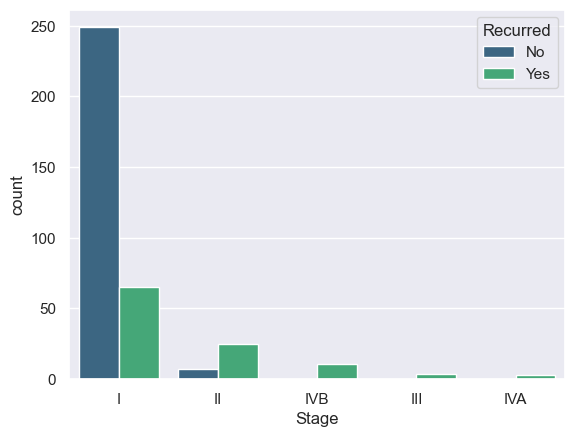

In [39]:
#Stage 
sns.countplot(df, x="Stage",hue="Recurred", palette = 'viridis')
plt.show()

In [43]:
## LABEL ENCODER - ENCODING CATEGORICAL COLUMNS
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_Gender = LabelEncoder()
label_Smoking = LabelEncoder()
label_Smoking_History = LabelEncoder()
label_Radiotherapy_History = LabelEncoder()
label_Thyroid_Function = LabelEncoder()
label_Physical_Examination = LabelEncoder()
label_Adenopathy = LabelEncoder()
label_Pathology = LabelEncoder()
label_Focality = LabelEncoder()
label_Cancer_Metastasis = LabelEncoder()
label_Lymph_Nodes	 = LabelEncoder()
label_Stage = LabelEncoder()
label_Tumor = LabelEncoder()
label_Treatment_Response	= LabelEncoder()
label_= LabelEncoder()
label_Recurred = LabelEncoder()


# Fit and transform the label encoding
df['Gender'] = label_Gender.fit_transform(df['Gender'])
df['Smoking'] = label_Smoking.fit_transform(df['Smoking'])
df['Smoking History'] = label_Smoking_History.fit_transform(df['Smoking History'])
df['Radiotherapy History'] = label_Radiotherapy_History.fit_transform(df['Radiotherapy History'])
df['Thyroid Function'] = label_Thyroid_Function.fit_transform(df['Thyroid Function'])
df['Physical Examination'] = label_Physical_Examination.fit_transform(df['Physical Examination'])
df['Adenopathy'] = label_Adenopathy.fit_transform(df['Adenopathy'])
df['Pathology'] = label_Pathology.fit_transform(df['Pathology'])
df['Focality'] = label_Focality.fit_transform(df['Focality'])
df['Cancer Metastasis'] = label_Cancer_Metastasis.fit_transform(df['Cancer Metastasis'])
df['Lymph Nodes'] = label_Lymph_Nodes	.fit_transform(df['Lymph Nodes'])
df['Tumor'] = label_Tumor.fit_transform(df['Tumor'])
df['Stage'] = label_Stage.fit_transform(df['Stage'])
df['Treatment Response'] = label_Treatment_Response.fit_transform(df['Treatment Response'])
df['Recurred'] = label_Recurred.fit_transform(df['Recurred'])
print('a')

a


In [45]:
## ORDINAL ENCODING
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories for the 'Risk' column
categories = [['Low', 'Intermediate', 'High']]  # Specify the categories in the desired order

# Initialize OrdinalEncoder with specified categories
oe = OrdinalEncoder(categories=categories)

# Fit and transform the ordinal encoding
df['Risk'] = oe.fit_transform(df[['Risk']])

In [47]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,0.0,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,0.0,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,0.0,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,0.0,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,0.0,0,0,0,0,1,0


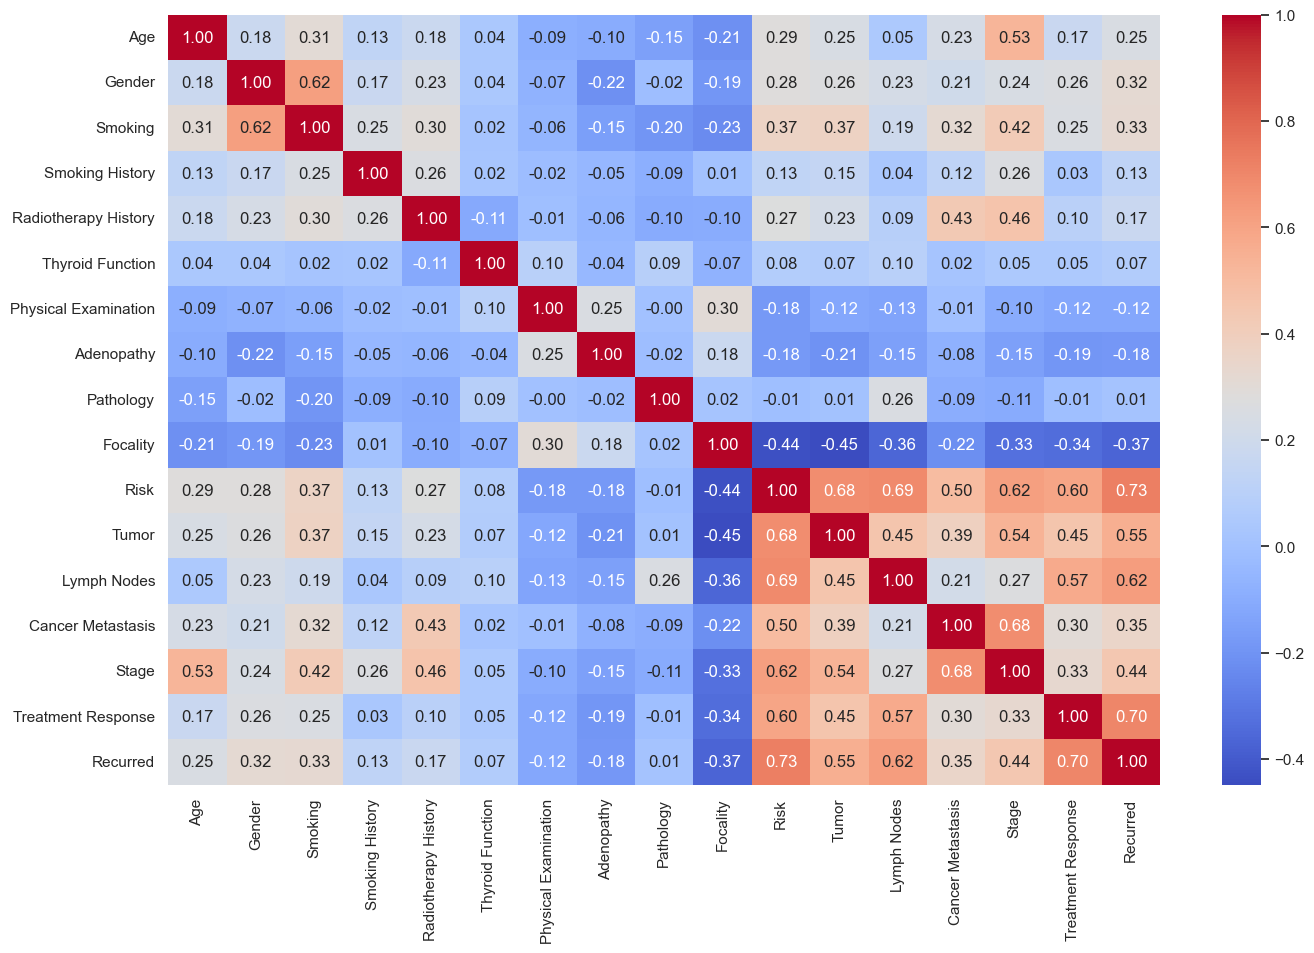

In [49]:
plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, fmt=".2f")
plt.show()

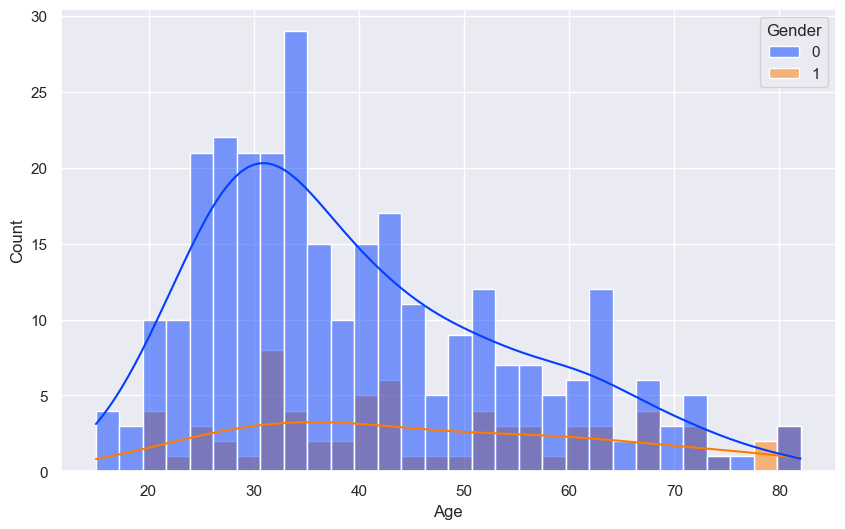

In [51]:
#Age distribution
plt.figure(figsize=(10,6))
sns.histplot(x = 'Age', data = df, bins = 30, kde = True, hue= 'Gender', palette = 'bright')
plt.show()

<Axes: xlabel='Age'>

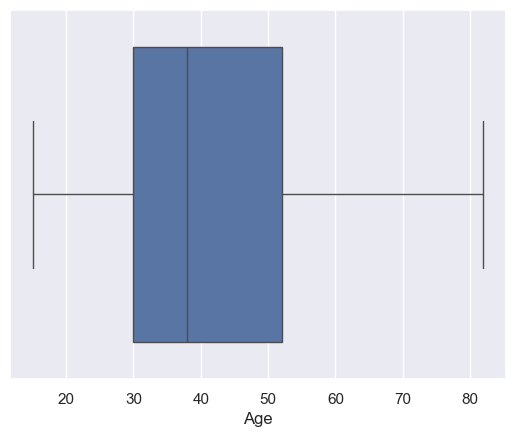

In [53]:
sns.boxplot(x=df['Age'])

In [55]:
## Segregating features and target variable
x = df.drop('Recurred', axis=1)  # Features
y = df['Recurred'] #Target

In [57]:
## Standardizing data
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [59]:
## Train teat split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

In [61]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [63]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 97.3 %


Precision: 1.00
Recall: 0.92
------------------------------------------------------------


<Axes: >

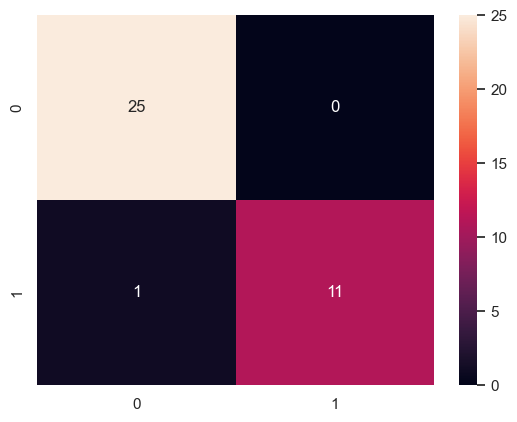

In [65]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

In [67]:
## Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

# Convert predictions to binary or categorical format (if applicable)
# For example, rounding the predictions for a binary outcome (0 or 1)
y_pred_lr_rounded = np.round(y_pred_lr)

# Calculate accuracy (assuming y_test contains binary labels)
accuracy_lr = accuracy_score(y_test, y_pred_lr_rounded) * 100

# Print accuracy
print('Linear Regression Model')
print('--' * 30)
print('Accuracy:', round(accuracy_lr, 2), '%')

Linear Regression Model
------------------------------------------------------------
Accuracy: 94.59 %


Precision: 1.00
Recall: 0.83
------------------------------------------------------------


<Axes: >

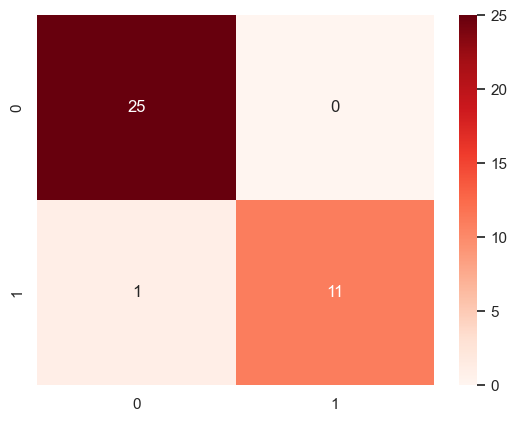

In [69]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred_lr_rounded)
recall = recall_score(y_test, y_pred_lr_rounded)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--" * 30)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, cmap='Reds', fmt="d")

In [71]:
## SVM
from sklearn.svm import SVC

print('Support Vector Classifier')
# Create an instance of the model
svc = SVC()

# Pass training data into the model
svc.fit(x_train, y_train)

Support Vector Classifier


SVC()

In [73]:
from sklearn.metrics import accuracy_score

# Prediction from the SVM model
y_pred_svc = svc.predict(x_test)

# Score It
print('Support Vector Classifier')
print('--' * 30)

# Accuracy
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)
print('Accuracy:', svc_accuracy, '%')

Support Vector Classifier
------------------------------------------------------------
Accuracy: 94.59 %


Precision: 1.00
Recall: 0.83
------------------------------------------------------------


<Axes: >

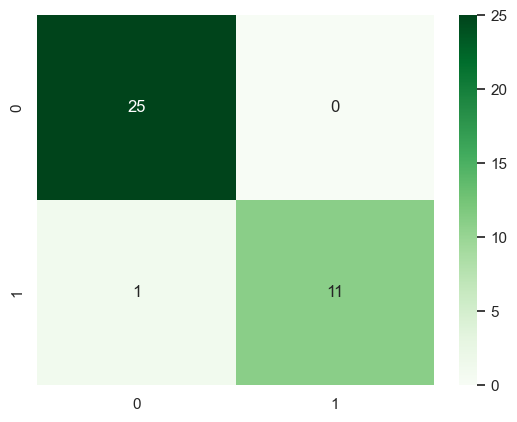

In [75]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred_lr_rounded)
recall = recall_score(y_test, y_pred_lr_rounded)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--" * 30)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, cmap='Greens', fmt="d")

Random Forest Accuracy: 97.30%


<Axes: >

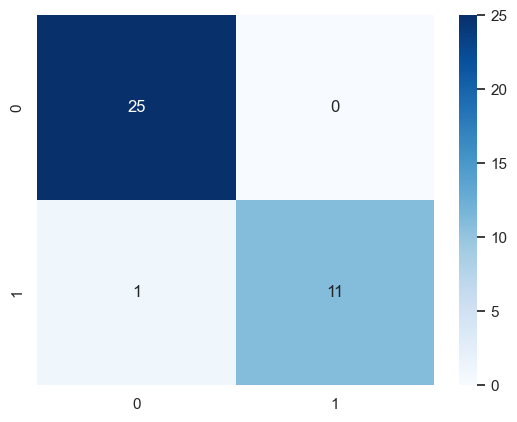

In [77]:
## Applying Bagging with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(x_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

# Confusion matrix
rf_confusion = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_confusion, annot=True, cmap='Blues', fmt="d")

In [83]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 1.0 MB/s eta 0:02:01
   ---------------------------------------- 0.3/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.7/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 1.0/124.9 MB 4.1 MB/s eta 0:00:30
   ---------------------------------------- 1.5/124.9 MB 4.9 MB/s eta 0:00:26
    --------------------------------------- 1.9/124.9 MB 5.4 MB/s eta 0:00:23
    --------------------------------------- 2.2/124.9 MB 5.7 MB/s eta 0:00:22
    --------------------------------------- 2.4/124.9 MB 5.6 MB/s eta 0:00:22
    --------------------------------------- 2.4/124.9 MB 5.6 MB/s eta 0:00:22
    --------------------------------------- 3.1/124.9 MB 5.8 MB/s eta 0:00:2

XGBoost Accuracy: 94.59%


<Axes: >

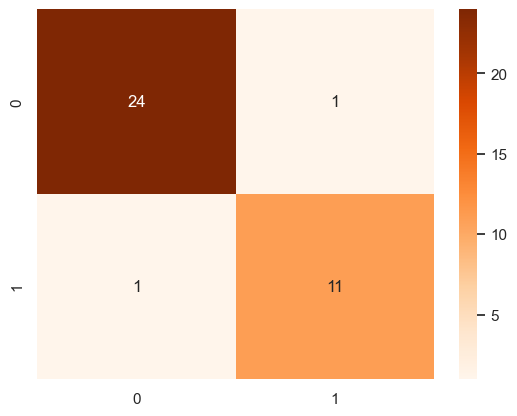

In [85]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_clf.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(x_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')

# Confusion matrix
xgb_confusion = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(xgb_confusion, annot=True, cmap='Oranges', fmt="d")